# DAT565 Introduction to Data Science and AI 
## 2023-2024, LP1
## Assignment 4: Spam classification using Naïve Bayes 
## Module 4 Group 32: Aghigh Merikhi(10 h) - Seyedehnaghmeh Mosaddeghi(10 h)  

This assignment has three obligatory questions. Questions 4-5 are optional and will not be graded.

The exercise takes place in this notebook environment where you can chose to use Jupyter or Google Colabs. We recommend you use Google Colabs as it will facilitate remote group-work and makes the assignment less technical. 

*Tips:* 
* You can execute certain Linux shell commands by prefixing the command with a `!`. 
* You can insert Markdown cells and code cells. The first you can use for documenting and explaining your results, the second you can use to write code snippets that execute the tasks required.  

In this assignment you will implement a Naïve Bayes classifier in Python that will classify emails into spam and non-spam (“ham”) classes.  Your program should be able to train on a given set of spam and “ham” datasets. 

You will work with the datasets available at https://spamassassin.apache.org/old/publiccorpus/. There are three types of files in this location: 
-	easy-ham: non-spam messages typically quite easy to differentiate from spam messages. 
-	hard-ham: non-spam messages more difficult to differentiate 
-	spam: spam messages 

**Execute the cell below to download and extract the data into the environment of the notebook -- it will take a few seconds.** 

If you chose to use Jupyter notebooks you will have to run the commands in the cell below on your local computer. Note that if you are using Windows, you can instead use (7zip)[https://www.7-zip.org/download.html] to decompress the data (you will have to modify the cell below).

**What to submit:** 
* Convert the notebook to a PDF file by compiling it, and submit the PDF file. 
* Make sure all cells are executed so all your code and its results are included. 
* Double-check that the PDF displays correctly before you submit it.

In [ ]:
# download and extract the data
!wget https://spamassassin.apache.org/old/publiccorpus/20021010_easy_ham.tar.bz2
!wget https://spamassassin.apache.org/old/publiccorpus/20021010_hard_ham.tar.bz2
!wget https://spamassassin.apache.org/old/publiccorpus/20021010_spam.tar.bz2
!tar -xjf 20021010_easy_ham.tar.bz2
!tar -xjf 20021010_hard_ham.tar.bz2
!tar -xjf 20021010_spam.tar.bz2

--2023-09-24 09:38:06--  https://spamassassin.apache.org/old/publiccorpus/20021010_easy_ham.tar.bz2
Resolving spamassassin.apache.org (spamassassin.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to spamassassin.apache.org (spamassassin.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1677144 (1.6M) [application/x-bzip2]
Saving to: ‘20021010_easy_ham.tar.bz2.7’

20021010_easy_ham.t 100%[===================>]   1.60M  --.-KB/s    in 0.007s  

2023-09-24 09:38:06 (236 MB/s) - ‘20021010_easy_ham.tar.bz2.7’ saved [1677144/1677144]

--2023-09-24 09:38:06--  https://spamassassin.apache.org/old/publiccorpus/20021010_hard_ham.tar.bz2
Resolving spamassassin.apache.org (spamassassin.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to spamassassin.apache.org (spamassassin.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1021126 (997K) [application/x-bzip2]
Saving to: ‘20021010_hard

The data is now in the following three folders: `easy_ham`, `hard_ham`, and `spam`. You can confirm this via the following command:

In [ ]:
!ls -lah

total 33M
drwxrwxrwx 6 root root   35 Sep 24 09:38 .
drwxr-xr-x 1 root root  211 Sep 24 09:35 ..
-rw-r--r-- 1 root root 1.6M Jun 29  2004 20021010_easy_ham.tar.bz2
-rw-r--r-- 1 root root 1.6M Jun 29  2004 20021010_easy_ham.tar.bz2.1
-rw-r--r-- 1 root root 1.6M Jun 29  2004 20021010_easy_ham.tar.bz2.2
-rw-r--r-- 1 root root 1.6M Jun 29  2004 20021010_easy_ham.tar.bz2.3
-rw-r--r-- 1 root root 1.6M Jun 29  2004 20021010_easy_ham.tar.bz2.4
-rw-r--r-- 1 root root 1.6M Jun 29  2004 20021010_easy_ham.tar.bz2.5
-rw-r--r-- 1 root root 1.6M Jun 29  2004 20021010_easy_ham.tar.bz2.6
-rw-r--r-- 1 root root 1.6M Jun 29  2004 20021010_easy_ham.tar.bz2.7
-rw-r--r-- 1 root root 998K Dec 16  2004 20021010_hard_ham.tar.bz2
-rw-r--r-- 1 root root 998K Dec 16  2004 20021010_hard_ham.tar.bz2.1
-rw-r--r-- 1 root root 998K Dec 16  2004 20021010_hard_ham.tar.bz2.2
-rw-r--r-- 1 root root 998K Dec 16  2004 20021010_hard_ham.tar.bz2.3
-rw-r--r-- 1 root root 998K Dec 16  2004 20021010_hard_ham.tar.bz2.4
-rw-r--r--

### 1. Preprocessing: 
Note that the email files contain a lot of extra information, besides the actual message. Ignore that for now and run on the entire text (in the optional part further down, you can experiment with filtering out the headers and footers). 
1.	We don’t want to train and test on the same data (it might help to reflect on **why** ,if you don't recall). Split the spam and ham datasets into a training set and a test set. (`hamtrain`, `spamtrain`, `hamtest`, and `spamtest`). Use `easy_ham` for quesions 1 and 2.


In [ ]:
import os
from sklearn.model_selection import train_test_split

easy_ham_path = '/work/easy_ham'
hard_ham_path = '/work/hard_ham'
spam_path = '/work/spam'

# Empty lists to store ham and spam emails
easy_ham_emails = []
hard_ham_emails = []
spam_emails = []

# Loop through the files in the easy_ham
for filename in os.listdir(easy_ham_path):
    with open(os.path.join(easy_ham_path, filename), 'r', encoding='latin-1') as file:
        # Read the email content
        email_content = file.read()
        
        # Append the email to the ham list
        easy_ham_emails.append(email_content)

# Loop through the files in the hard_ham
for filename in os.listdir(hard_ham_path):
    with open(os.path.join(hard_ham_path, filename), 'r', encoding='latin-1') as file:
        # Read the email content
        email_content = file.read()
        
        # Append the email to the ham list
        hard_ham_emails.append(email_content)

# Loop through the files in the spam
for filename in os.listdir(spam_path):
    with open(os.path.join(spam_path, filename), 'r', encoding='latin-1') as file:
        # Read the email content
        email_content = file.read()
        
        # Append the email to the spam list
        spam_emails.append(email_content)

# Split the easy and hard ham and spam emails into training and testing sets
easy_ham_train, easy_ham_test = train_test_split(easy_ham_emails, test_size=0.2, random_state=42)
hard_ham_train, hard_ham_test = train_test_split(hard_ham_emails, test_size=0.2, random_state=42)
spam_train, spam_test = train_test_split(spam_emails, test_size=0.2, random_state=42)

# Print the number of emails in each set
print(f"Number of easy ham emails in training set: {len(easy_ham_train)}")
print(f"Number of easy ham emails in testing set: {len(easy_ham_test)}")
print(f"Number of hard ham emails in training set: {len(hard_ham_train)}")
print(f"Number of hard ham emails in testing set: {len(hard_ham_test)}")
print(f"Number of spam emails in training set: {len(spam_train)}")
print(f"Number of spam emails in testing set: {len(spam_test)}")

Number of easy ham emails in training set: 2040
Number of easy ham emails in testing set: 511
Number of hard ham emails in training set: 200
Number of hard ham emails in testing set: 50
Number of spam emails in training set: 400
Number of spam emails in testing set: 101


### 2. Write a Python program that: 
1.	Uses the four datasets from Question 1 (`hamtrain`, `spamtrain`, `hamtest`, and `spamtest`).
2.	Trains a Naïve Bayes classifier (use the [scikit-learn library](https://scikit-learn.org/stable/)) on `hamtrain` and `spamtrain`, that classifies the test sets and reports True Positive and False Negative rates on the `hamtest` and `spamtest` datasets. You can use `CountVectorizer` ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer)) to transform the email texts into vectors. Please note that there are different types of Naïve Bayes Classifiers available in *scikit-learn* ([Documentation here](https://scikit-learn.org/stable/modules/naive_bayes.html)). Here, you will test two of these classifiers that are well suited for this problem:
- Multinomial Naive Bayes
- Bernoulli Naive Bayes.

Please inspect the documentation to ensure input to the classifiers is appropriate before you start coding. You may have to modify your input.

We want to perform email classification between "ham" (non-spam) and "spam" using two different Naive Bayes classifiers, Multinomial Naive Bayes and Bernoulli Naive Bayes. Firstly, we combined Training and Testing Datasets, meaning  "easy_ham_train" and "spam_train" datasets are combined into the training dataset `X_train` and the "easy_ham_test" and "spam_test" datasets combined into the testing dataset `X_test`. This step is crucial because it ensures that you have different datasets for training and testing, which is necessary for evaluating the classifiers' performance. Then we created labeled for the dataset. "ham" emails are assigned the label 0, and "spam" emails are assigned the label 1. This labeling is essential foe the model to learn to classify emails based on these labels. After that we did the text Vectorization with "CountVectorizer". It converts the text data into numerical vectors where each element represents the frequency of a word in the text. We fit and transform the training data (`X_train`) to create numerical vectors (`X_train_vectorized`), and then transform the testing data (`X_test`) using the same vectorizer. This ensures that the same vocabulary and word frequencies are used for both training and testing. Next, we train our Multinomial Naive Bayes classifier (`multi_NB_classifier`) using the vectorized training data (`X_train_vectorized`) and corresponding labels (`y_train`). And we did the same with our Bernoulli Naive Bayes classifier (`bern_NB_classifier`). We used both trained classifiers to predict labels for the testing data (`X_test_vectorized`). Finally, to evaluate the classifiers' performance, we calculate confusion matrices  using the true labels and the predicted labels. 

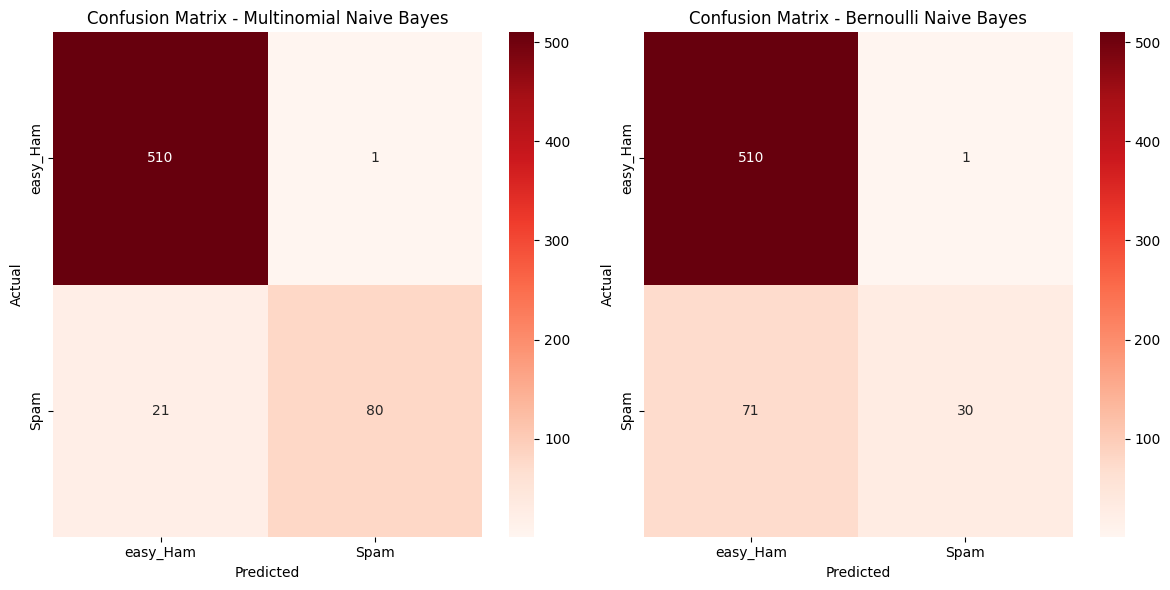

Accuracy for Multinomial Naive Bayes - easy ham Vs. spam: 0.9640522875816994
Accuracy for Bernoulli Naive Bayes - easy ham Vs. spam: 0.8823529411764706


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

# Combine the training and testing datasets for ham and spam
X_train = easy_ham_train + spam_train
X_test = easy_ham_test + spam_test

# Create labels for the datasets (0 for ham, 1 for spam)
y_train = [0] * len(easy_ham_train) + [1] * len(spam_train)
y_test = [0] * len(easy_ham_test) + [1] * len(spam_test)

# Initialize CountVectorizer to convert text data into numerical vectors
vectorizer = CountVectorizer()

# Fit and transform the training data, and transform the testing data
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Initialize Multinomial Naive Bayes classifier
multi_NB_classifier = MultinomialNB()
# Train the Multinomial Naive Bayes classifier
multi_NB_classifier.fit(X_train_vectorized, y_train)

# Initialize Bernoulli Naive Bayes classifier
bern_NB_classifier = BernoulliNB()
# Train the Bernoulli Naive Bayes classifier
bern_NB_classifier.fit(X_train_vectorized, y_train)

# Predict labels for the test data using both classifiers
multi_NB_predictions = multi_NB_classifier.predict(X_test_vectorized)
bern_NB_predictions = bern_NB_classifier.predict(X_test_vectorized)


# Calculate confusion matrices for both classifiers
conf_mat_multi_NB = confusion_matrix(y_test, multi_NB_predictions)
conf_mat_bern_NB = confusion_matrix(y_test, bern_NB_predictions)

# Plot confusion matrix for Multinomial Naive Bayes
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(conf_mat_multi_NB, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['easy_Ham', 'Spam'], yticklabels=['easy_Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Multinomial Naive Bayes')

# Plot confusion matrix for Bernoulli Naive Bayes
plt.subplot(1, 2, 2)
sns.heatmap(conf_mat_bern_NB, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['easy_Ham', 'Spam'], yticklabels=['easy_Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Bernoulli Naive Bayes')

plt.tight_layout()
plt.show()


# Calculate accuracy for Multinomial Naive Bayes
accuracy_multi_NB = accuracy_score(y_test, multi_NB_predictions)

# Calculate accuracy for Bernoulli Naive Bayes
accuracy_bern_NB = accuracy_score(y_test, bern_NB_predictions)

# Print the accuracies
print("Accuracy for Multinomial Naive Bayes - easy ham Vs. spam:", accuracy_multi_NB)
print("Accuracy for Bernoulli Naive Bayes - easy ham Vs. spam:", accuracy_bern_NB)



### 3. Run on hard ham:
Run the two models from Question 2 on `spam` versus `hard-ham`, and compare to the `easy-ham` results.

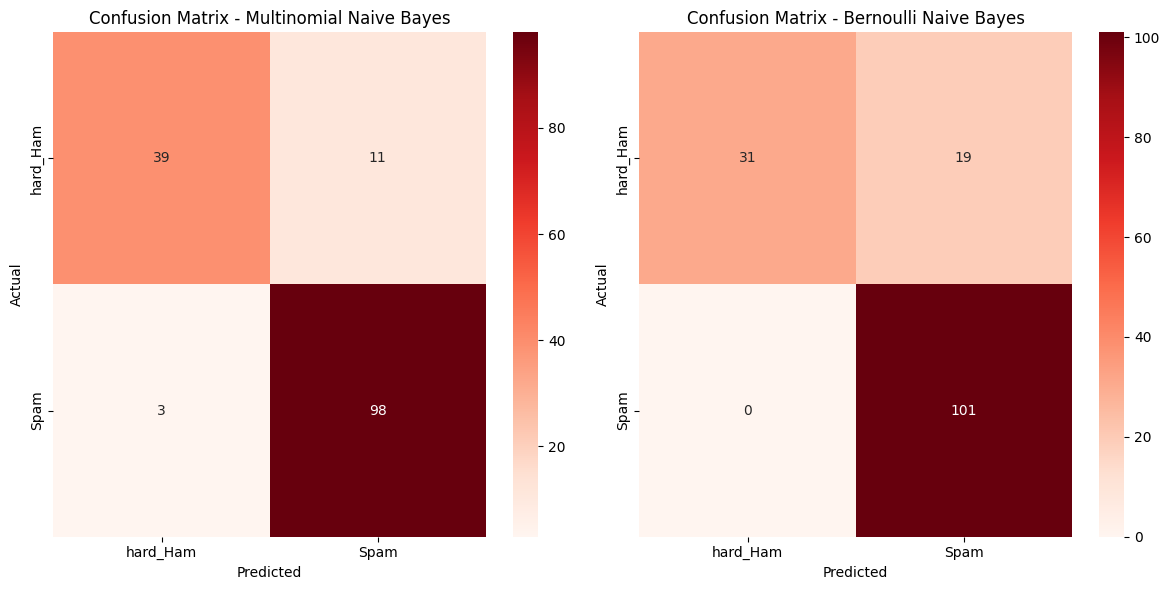

Accuracy for Multinomial Naive Bayes - hard ham Vs. Spam: 0.9072847682119205
Accuracy for Bernoulli Naive Bayes - hard ham Vs. Spam: 0.8741721854304636


In [ ]:
# Combine the training and testing datasets for hard-ham and spam
X_train_hard_ham = hard_ham_train + spam_train
X_test_hard_ham = hard_ham_test + spam_test

# Create labels for the datasets (0 for hard-ham, 1 for spam)
y_train_hard_ham = [0] * len(hard_ham_train) + [1] * len(spam_train)
y_test_hard_ham = [0] * len(hard_ham_test) + [1] * len(spam_test)

# Initialize CountVectorizer to convert text data into numerical vectors
vectorizer = CountVectorizer()

# Fit and transform the training data, and transform the testing data
X_train_vectorized_hard_ham = vectorizer.fit_transform(X_train_hard_ham)
X_test_vectorized_hard_ham = vectorizer.transform(X_test_hard_ham)

# Train the Multinomial Naive Bayes classifier
multi_NB_classifier.fit(X_train_vectorized_hard_ham, y_train_hard_ham)

# Train the Bernoulli Naive Bayes classifier
bern_NB_classifier.fit(X_train_vectorized_hard_ham, y_train_hard_ham)

# Predict labels for the test data using both classifiers
multi_NB_predictions_hard_ham = multi_NB_classifier.predict(X_test_vectorized_hard_ham)
bern_NB_predictions_hard_ham = bern_NB_classifier.predict(X_test_vectorized_hard_ham)

# Calculate confusion matrices for both classifiers
confmat_multi_NB = confusion_matrix(y_test_hard_ham, multi_NB_predictions_hard_ham)
confmat_bern_NB = confusion_matrix(y_test_hard_ham, bern_NB_predictions_hard_ham)

# Plot confusion matrix for Multinomial Naive Bayes
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(confmat_multi_NB, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['hard_Ham', 'Spam'], yticklabels=['hard_Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Multinomial Naive Bayes')

# Plot confusion matrix for Bernoulli Naive Bayes
plt.subplot(1, 2, 2)
sns.heatmap(confmat_bern_NB, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['hard_Ham', 'Spam'], yticklabels=['hard_Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Bernoulli Naive Bayes')

plt.tight_layout()
plt.show()


# Calculate accuracy for Multinomial Naive Bayes
accuracy_multi_NB_hard_ham = accuracy_score(y_test_hard_ham, multi_NB_predictions_hard_ham)

# Calculate accuracy for Bernoulli Naive Bayes
accuracy_bern_NB_hard_ham = accuracy_score(y_test_hard_ham, bern_NB_predictions_hard_ham)

# Print the accuracies
print("Accuracy for Multinomial Naive Bayes - hard ham Vs. Spam:", accuracy_multi_NB_hard_ham)
print("Accuracy for Bernoulli Naive Bayes - hard ham Vs. Spam:", accuracy_bern_NB_hard_ham)


If we want to compare the two models on spam versus easy-ham and two models on spam versus hard-ham, on a general view we can see that in easy-ham models, the predictions are more accurate in easy-ham itself since. The easy ham emails that were predicted spam are really low. This shows that the models are able enough to identify easy ham emails that are actually easy ham. On the other hand, there are some few spam email that are identified as easy ham emails. This can be the the bug for these models.

Considering the hard-ham models, the number of spam emails that were predicted correctly is much higher than the number of hard ham emails being predicted correctly. Few number of spam emails were predicted as hard ham and some hard ham emails were predicted at spam. Generally we can see that the models on hard-ham are more capable of identifying spam emails rather than hard ham emails. This can be because of the challenge of identifying hard ham emails which is why they are named hard ham. We also know that the number of training data in models on easy-ham is considerably higher than in models on hard-ham. The higher number of data plays an important role in the accuracy of the model. with higher number number of data, the model gets more closer to the actual values. This can be the other reason why models on easy-ham identified ham emails better that models on hard-ham. We can see that by comparing the accuracy of both models. According to the results, both models on easy-ham have higher accuracy than both models on hard-ham if we compare each model type together. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=05d86ed7-77dc-4d57-baa3-23063c711d41' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>